# Start Up: 
Before Running the cell below, you must ensure that these have been run in Terminal **IN ORDER** : 
- conda update -n base -c defaults conda 

    - cd SageMaker
    
      - cd yelp-dataset-challenge-1-ds
      
         - conda env create -f environment.yml
          
            - source activate ydc1 
                
                - pip install python-decouple
                  
                  - pip install pprintpp

# Imports: 

In [2]:
import pandas as pd
import s3
from pprintpp import pprint as pp
from sklearn.externals import joblib
import json

# Load in Bucket
bucket = s3.Bucket('yelpchallenge1')

# Look inside Bucket 
bucket.contents

['API/',
 'API/api.py',
 'API/api_exploration.ipynb',
 'Environments/',
 'Environments/environment.yml',
 'Flask_App/',
 'Flask_App/Pipfile',
 'Flask_App/__init__.py',
 'Flask_App/app.py',
 'Flask_App/models.py',
 'Flask_App/yelp.py',
 'Model/',
 'Model/vect_1.sav',
 'datasets/',
 'datasets/df.csv',
 'datasets/dtm.csv',
 'datasets/dtm_final.csv',
 'notebooks/',
 'notebooks/data_cleanup.ipynb',
 'notebooks/official_NB.ipynb',
 'notebooks/vectorization_exploration.ipynb',
 'notebooks/yelp_data_initial_exploration.ipynb']

In [ ]:
                    ### ***** DO NOT RUN. ******* #### 
                  ### ***** ALREADY INSTALLED. ****** ###

    # Installs the File 'Locally' on SageMaker Instance / Only have to run these once: 

bucket.get('datasets/df.csv', 'df.csv')

    # Installing .json Files 'Locally'
    
bucket.get('datasets/user.json', 'user.json')
bucket.get('datasets/review.json', 'review.json')

# Cleaning Data: Complete as of ***8:14 PM : 12/19/2019***

Cleaning df.csv & saving Cleaned df.csv

In [12]:
                    ### ***** DO NOT RUN. ******* #### 
                  ### ***** ALREADY COMPLETE. ****** ###
# Further Cleaning of df.csv: 
# Import 
df = pd.read_csv('df.csv')
# Dropping Columns:
#df = df.drop(columns=['Unnamed: 0', 'stars'])

# Dropping all Missing / Na Values from Entire Dataframe:
df = df.dropna()

    # Saving Cleaned df.csv 
df.to_csv(index=True)
df.to_csv(r'df.csv')

Converting user_json & to Pandas DataFrame / Saving as user.csv & review.csv

In [35]:
                              # ******* DO NOT RUN! ******* # 
                            # ***** ALREADY COMPLETE. ****** # 
 # import user.json
with open('user.json') as f:
    user = json.loads("[" + 
                      f.read().replace("}\n{", "},\n{") + 
                      "]")
    
    # convert user.json files to pandas DataFrame 'user_df'
user_df = pd.DataFrame(user)

    # Saving user_df as csv file. 
user_df.to_csv(index=True)
user_df.to_csv(r'user.csv')

# Import review.json 
with open('review.json') as f:
    review = json.loads("[" + 
                        f.read().replace("}\n{", "},\n{") + 
                        "]")
    
    # convert review.json files to pandas DataFrame 'review_df'
review_df = pd.DataFrame(review)

    # Saving user_df as csv file. 
review_df.to_csv(index=True)
review_df.to_csv(r'review.csv')

# Data Merging: Complete as of ***8:14 PM : 12/19/2019***

In [ ]:
            # ***** New DTM DF HAS BEEN CREATED. DO NOT RUN THIS CELL **** #
# Read-in dtm.csv (Original)
dtm = pd.read_csv('dtm.csv')

    # Taking Stars Column
stars = df['stars']

    # Adding stars column to dtm
dtm['stars']=df['stars']

# Shifting 'Stars' Column to front of Df,
cols = list(dtm.columns)
cols = [cols[-1]] + cols[:-1]
dtm = dtm[cols]

    # Dropping "-PRON-", 'year -PRON-', and ' ' Columns
dtm = dtm.drop(columns=[' ', '  -PRON-', 'year -PRON-'])#Cut 135,000 Rows of df['stars'] Column to fix Memory Error. 
    # Label as "stars"
stars = df.stars[0:135000]
stars.shape
    # Adding stars to dtm2
dtm2['stars']=df['stars'][0:135000]

In [ ]:
             # ***** New DTM2 DF HAS BEEN CREATED. DO NOT RUN THIS CELL **** #
    
    # Read-in dtm2.csv(Old)
dtm2 = pd.read_csv('dtm2.csv')

    # Taking Stars Column
stars = df['stars']

    # Adding stars column to dtm
dtm2['stars']=df['stars']

    # Shifting 'Stars' Column to front of Df,
cols = list(dtm2.columns)
cols = [cols[-1]] + cols[:-1]
dtm2 = dtm2[cols]

dtm2 = dtm2.drop(columns=['stars'])

    # Dropping columns: 
dtm2 = dtm2.drop(columns=[' ' , '  '])
dtm2 = dtm2.drop(columns=['  -PRON-','  i',  '  the',  '  this', '$', "'s"])
    # Saving dtm2.csv 
dtm2.to_csv(index=True)
dtm2.to_csv(r'dtm2.csv')

    # Cut 135,000 Rows of df['stars'] Column to fix Memory Error. 
        # Label as "stars"     
stars = df.stars[0:135000]
stars.shape

        # Adding stars to dtm2
dtm2['stars']=df['stars'][0:135000]

    # Saving Final df as 'dtm_final'
dtm_final = dtm2

    # Saving dtm_final.csv 
dtm_final.to_csv(index=True)
dtm_final.to_csv(r'dtm_final.csv')


In [ ]:
# Read-in dtm_final.csv (FINAL)
#dtm_final = pd.read_csv('dtm_final.csv')

# Clean / Analyze user.csv: Complete as of ***10:14 PM 12/19/2019***

In [4]:
# Imports

    # Read-in user.csv
user = pd.read_csv('user.csv')
    # Read-in review.csv
review = pd.read_csv('review.csv')

/home/ec2-user/anaconda3/envs/ydc1/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
# Check Read-in of df_user
# Checking Null Values and Shape
pp(user.isna().sum())
pp(user.shape)

Unnamed: 0       0
fans             0
name             0
review_count     0
user_id          0
yelping_since    0
dtype: int64
(1637135, 6)


Three Problems: 
**Problem 1:**
user['Unamed: 0'] should not exist. 

**Problem 2:**
user['elite'] has 1,565,761 Missing Values. 

**Problem 3:** 
user['name'] has 3 Missing Values. 

**Solution?:**
Drop user['Unamed: 0' , 'elite']  Columns.

Drop Missing Values.

In [38]:
# Solution:
user = user.drop(columns=['Unnamed: 0', 'elite' ])
user = user.dropna()
# Save Cleaned user_df.csv 
user.to_csv(index=True)
user.to_csv(r'user.csv')

In [40]:
user.columns

Index(['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool',
       'fans', 'friends', 'funny', 'name', 'review_count', 'useful', 'user_id',
       'yelping_since'],
      dtype='object')

In [41]:
# drop unused columns from user_df
user = user.drop(columns=['average_stars', 'compliment_cool', 'compliment_cute',
       'compliment_funny', 'compliment_hot', 'compliment_list',
       'compliment_more', 'compliment_note', 'compliment_photos',
       'compliment_plain', 'compliment_profile', 'compliment_writer', 'cool', 'friends', 'funny', 'useful'])

# Save Cleaned user_df.csv 
user.to_csv(index=True)
user.to_csv(r'user.csv')

# Clean / Analyze review.csv: 

In [6]:
# Check Read-in of review.csv
# Checking Null Values and Shape
pp(review.isna().sum())
pp(review.shape)

Unnamed: 0     0
business_id    0
cool           0
date           2
funny          2
review_id      2
stars          2
text           4
useful         4
user_id        4
dtype: int64
(6685902, 10)


**Minor Problem(s) with a Simple Solution**

**Problems?:** 
review['date', 'funny', 'review_id', 'stars', 'text', 'useful'] Columns have NaN's. 

review['Unnamed: 0'] Not Supposed to be there.

**Solution?:**
Drop Missing Values from review DataFrame. 

In [8]:
# Solution: 
review = review.dropna()
review = review.drop(columns=['Unnamed: 0', 'stars', 'business_id'])
# Save Cleaned review_df.csv 
review.to_csv(index=True)
review.to_csv(r'review.csv')

In [10]:
review = review.drop(columns=['text'])
review.to_csv(index=True)
review.to_csv(r'review.csv')

In [46]:
#Adding df['text', 'tokens'] to review.csv
review['text'] = df['text']
review['tokens'] = df['tokens']
#review = review.drop(columns=['tokens'])

In [36]:
review.head(5)

,cool,date,funny,review_id,useful,user_id,text
0,0,2013-05-07 04:34:36,1.0,Q1sbwvVQXV2734tPgoKj4Q,6.0,hG7b0MtEbXx5QzbzE6C_VA,Total bill for this horrible service? Over $8G...
1,0,2017-01-14 21:30:33,0.0,GJXCdrto3ASJOqKeVWPi6Q,0.0,yXQM5uF2jS6es16SJzNHfg,I *adore* Travis at the Hard Rock's new Kelly ...
2,0,2016-11-09 20:09:03,0.0,2TzJjDVDEuAW6MR5Vuc1ug,3.0,n6-Gk65cPZL6Uz8qRm3NYw,I have to say that this office really has it t...
3,0,2018-01-09 20:56:38,0.0,yi0R0Ugj_xUx_Nek0-_Qig,0.0,dacAIZ6fTM6mqwW5uxkskg,Went in for a lunch. Steak sandwich was delici...
4,0,2018-01-30 23:07:38,0.0,11a8sVPMUFtaC7_ABRkmtw,7.0,ssoyf2_x0EQMed6fgHeMyQ,Today was my second out of three sessions I ha...


# Combining review.csv, & df.csv 

**Description**: 

Combining based on their *Unique Account ID's.*
The end Product will be One DataFrame Consisting of Each Account:
- **Name**, 
- **User_ID**,
- **Review_ID**,
- **Text**,
- **That Users respective review(s)**,
- **Interactions that Review (i.e: Cool, Funny, Useful)**  

The goal of the model is to have the ability to type in the Review you are wanting to post on Yelp, and give the User the ability to Predict What type of Interaction they would potentially receive and Total Number of each interaction. The model Accuracy will be Displayed beside the Prediction. 

In [37]:
# Changing Layout of Columns 
final_df = review[['user_id', 'date', 'review_id', 'useful', 'funny', 'cool', 'text']]

#Saving Final_df
final_df.to_csv(index=True)
final_df.to_csv(r'final.csv')

In [38]:
# Checking Null Values and Shape
pp(final_df.isna().sum())
pp(final_df.shape)

user_id       0
date          0
review_id     0
useful        0
funny         0
cool          0
text         28
dtype: int64
(6685896, 7)


In [40]:
# Dropping Null Values from [text] column
final = final_df.dropna()

In [42]:
# Checking Null Values and Shape
pp(final.isna().sum())
pp(final.shape)

user_id      0
date         0
review_id    0
useful       0
funny        0
cool         0
text         0
dtype: int64
(6685868, 7)


In [47]:
#Saving Final
final.to_csv(index=True)
final.to_csv(r'final.csv')

In [49]:
final.head(5)

,user_id,date,review_id,useful,funny,cool,text,tokens
0,hG7b0MtEbXx5QzbzE6C_VA,2013-05-07 04:34:36,Q1sbwvVQXV2734tPgoKj4Q,6.0,1.0,0,Total bill for this horrible service? Over $8G...,"['total', 'horrible', 'service', 'crooks', 'ac..."
1,yXQM5uF2jS6es16SJzNHfg,2017-01-14 21:30:33,GJXCdrto3ASJOqKeVWPi6Q,0.0,0.0,0,I *adore* Travis at the Hard Rock's new Kelly ...,"['adore', 'travis', 'hard', 'rock', 'kelly', '..."
2,n6-Gk65cPZL6Uz8qRm3NYw,2016-11-09 20:09:03,2TzJjDVDEuAW6MR5Vuc1ug,3.0,0.0,0,I have to say that this office really has it t...,"['office', 'organized', 'friendly', 'phillipp'..."
3,dacAIZ6fTM6mqwW5uxkskg,2018-01-09 20:56:38,yi0R0Ugj_xUx_Nek0-_Qig,0.0,0.0,0,Went in for a lunch. Steak sandwich was delici...,"['went', 'lunch', 'steak', 'sandwich', 'delici..."
4,ssoyf2_x0EQMed6fgHeMyQ,2018-01-30 23:07:38,11a8sVPMUFtaC7_ABRkmtw,7.0,0.0,0,Today was my second out of three sessions I ha...,"['today', 'second', 'sessions', 'paid', 'sessi..."


In [52]:
final.dtypes

user_id       object
date          object
review_id     object
useful       float64
funny        float64
cool          object
text          object
tokens        object
dtype: object

In [55]:
final['cool'] = final.cool.astype(float)

In [56]:
final.dtypes

user_id       object
date          object
review_id     object
useful       float64
funny        float64
cool         float64
text          object
tokens        object
dtype: object

In [ ]:
#Saving Final
final.to_csv(index=True)
final.to_csv(r'final.csv')

# Some Visulizations: 

In [61]:
# Imports 
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt


# Code for hiding seaborn warnings
import warnings
warnings.filterwarnings("ignore")

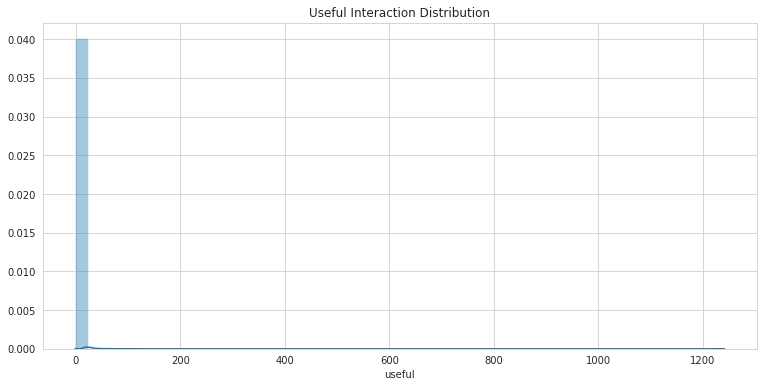

In [68]:
plt.figure(figsize=(12.8,6))
sns.distplot(final['useful']).set_title('Useful Interaction Distribution');